1. What is unsupervised learning in the context of machine learning?
- Unsupervised learning is a machie learnig technique where algorithms analyze and discover patterns, structures, or relationships within unlabeled data.


2. How does K-Means clustering algorithm work?
- K-means clustering is a method of vector quantization, originally from signal processing that aims to partition "n" observation into k clusters in whic each observation belong sto the cluster with the nearest mean, serving as a prototype of the cluster.

3.  Explain the concept of a dendrogram in hierarchical clustering.
- Aa dendrogram is a tree-structured graph used in heat maps to visualize the result of a hierarchical clustering calculation.

4. What is the main difference between K-Means and Hierarchical Clustering?
- K-means uses a predefined number of clusters and iteratively refines the cluster assignments, while hierarchical clustering creates a hierarchy of clusters, potentially revealing multiple levels of grouping.

5. What are the advantages of DBSCAN over K-Means?
- DBSCAN is better suited for datasets with irregular shapes or varying densities.

6. When would you use Silhouette Score in clustering?
- The Shilhouette Score is primarily used to evaluate the quality of clustering results, particulary in algorithms like K-means.

7. What are the limitations of Hierarchical Clustering?
- The computational cost and memory requirements of the method can be high, especially for larger datasets.

8. Why is feature scaling important in clustering algorithms like K-Means?
- Scaling the feature into a uniform range to avoid any feature becoming predominant in the distnace calculation and to hek=lp improve the clustering results.

9. How does DBSCAN identify noise points?
-DBSCAN identify noise points by analyzing the denstiy of data pointd within a specified radius and a minimum number of points within that radius.


10. Define inertia in the context of K-Means.
- It is calculated by measuring the distance between each data point and its cantroid, squaring this distance, and summing these squares across one cluster.

11. What is the elbow method in K-Means clustering?
- The elbow method is graphical method for finding the optimal K value in a k-mean clustering algorithm.

12.  Describe the concept of "density" in DBSCAN?
-IN DBSCAN, the density refers to the concentration of data points within a specific region.

13. Can hierarchical clustering be used on categorical data?
- Yes, hierarchical clustering can be used on categorical data.

14.What does a negative Silhouette Score indicate?
- A negative Silhouette score indicates that a data point has been assigned to the wrong cluster in a clustering analysis.

15. Explain the term "linkage criteria" in hierarchical clustering?
- The linking criteria determines which distance to use between sets of observation.

16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
- K-Means clustering often struggles with datasets having varying cluster sizes or densities because it's based on the assumption that clusters are roughly spherical and have similar sizes and densities.

17. What are the core parameters in DBSCAN, and how do they influence clustering?
- The two main parameters in DBSCAN are epsilon (ε), which defines the maximum distance between two points to be considered neighbors, and MinPts, which specifies the minimum number of points required to form a dense region.

18.  How does K-Means++ improve upon standard K-Means initialization?
- KMeans++ is an improved version of the KMeans algorithm that automatically chooses better starting points instead of selecting them randomly.

19. What is agglomerative clustering?
-Agglomerative clustering is a hierarchical clustering method where items are grouped into clusters based on similarities, starting with each item as a singleton cluster and then merging pairs of clusters until all items are in one large cluster.


20. What makes Silhouette Score a better metric than just inertia for model evaluation?
- The Silhouette Score is a more comprehensive metric than inertia because it considers both the cohesion of points within a cluster and the separation between clusters.

#Practical_Questions


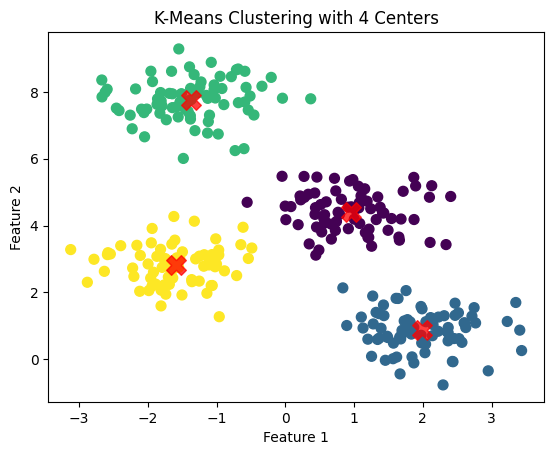

In [ ]:
#21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.


import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')  # Mark cluster centers
plt.title('K-Means Clustering with 4 Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
#22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.


from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data

agglo = AgglomerativeClustering(n_clusters=3)
labels = agglo.fit_predict(X)

print("First 10 predicted cluster labels:", labels[:10])


First 10 predicted cluster labels: [1 1 1 1 1 1 1 1 1 1]


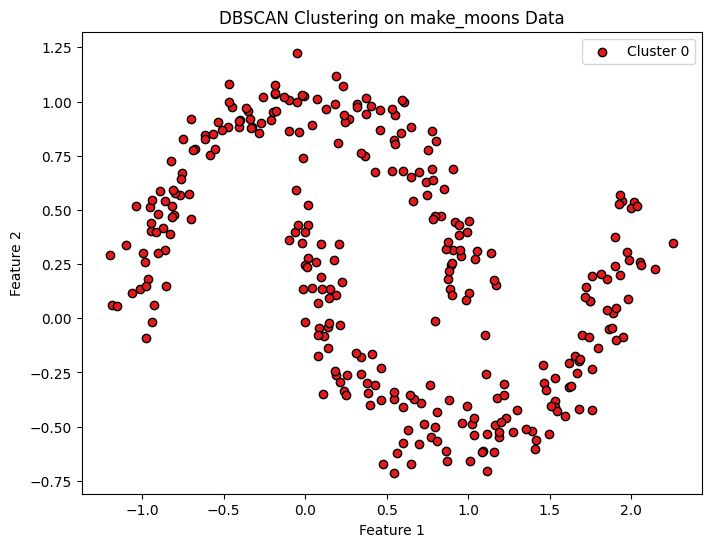

In [ ]:
#23.  Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=300, noise=0.1, random_state=0)

dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

plt.figure(figsize=(8,6))
unique_labels = set(labels)

for label in unique_labels:
    if label == -1:
        color = 'red'
        marker = 'x'
        label_name = 'Outliers'
    else:
        color = plt.cm.Set1(label / 10.)
        marker = 'o'
        label_name = f'Cluster {label}'

    plt.scatter(X[labels == label, 0], X[labels == label, 1],
                c=[color], marker=marker, label=label_name, edgecolors='k')

plt.legend()
plt.title('DBSCAN Clustering on make_moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
#23. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.


from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_scaled)

unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("Size of each cluster:")
for cluster, size in cluster_sizes.items():
    print(f"Cluster {cluster}: {size} samples")



Size of each cluster:
Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples


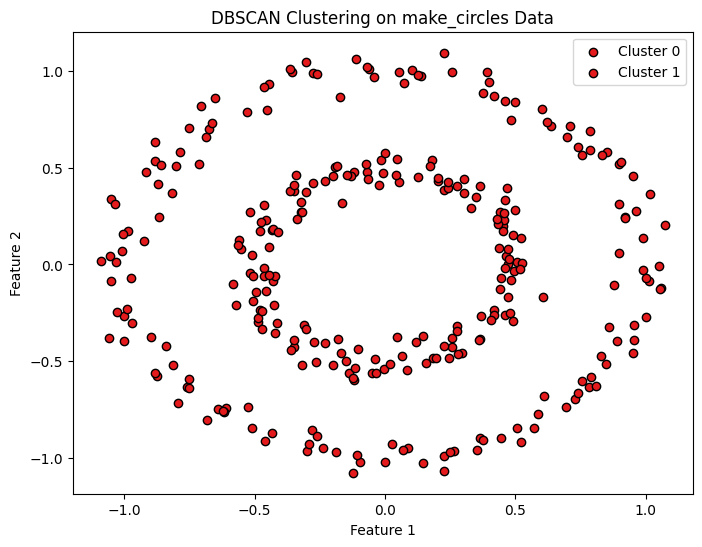

In [ ]:
#25.  Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.


import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

X, y = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=0)

dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

plt.figure(figsize=(8,6))
unique_labels = set(labels)

for label in unique_labels:
    if label == -1:
        color = 'red'
        marker = 'x'
        label_name = 'Outliers'
    else:
        color = plt.cm.Set1(label / 10.)
        marker = 'o'
        label_name = f'Cluster {label}'

    plt.scatter(X[labels == label, 0], X[labels == label, 1],
                c=[color], marker=marker, label=label_name, edgecolors='k')

plt.legend()
plt.title('DBSCAN Clustering on make_circles Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



In [1]:
#26.  Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids


from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

data = load_breast_cancer()
X = data.data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

centroids = kmeans.cluster_centers_

centroids_df = pd.DataFrame(centroids, columns=data.feature_names)
print("Cluster Centroids (after MinMax Scaling):\n")
print(centroids_df)


Cluster Centroids (after MinMax Scaling):

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.504836      0.395603        0.505787   0.363766         0.469887   
1     0.255354      0.288335        0.246964   0.143884         0.357431   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.422263        0.418387              0.46928       0.458997   
1          0.180195        0.103448              0.13066       0.340118   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.299459  ...      0.480474       0.451074         0.465530   
1                0.255916  ...      0.205241       0.320690         0.192421   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.314606          0.498688           0.363915         0.390273   
1    0.099434          0.357112           0.148739         0.131423   

   worst concave points  worst symmetry  worst 

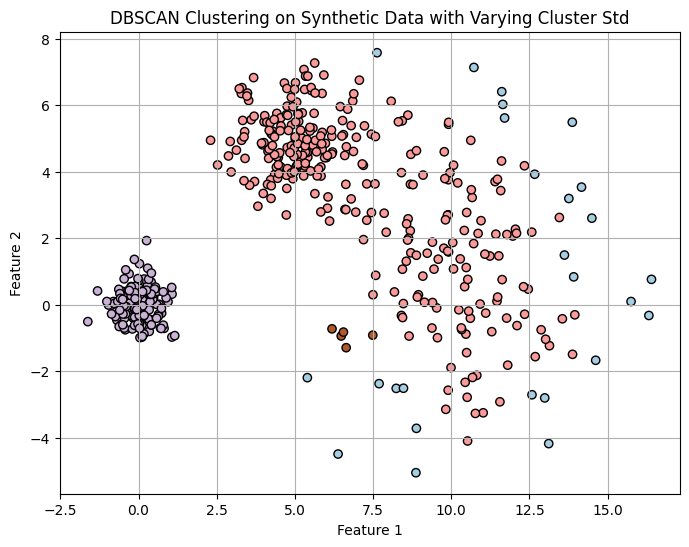

In [2]:
#27.  Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN


from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

centers = [(0, 0), (5, 5), (10, 1)]
cluster_std = [0.5, 1.0, 2.5]

X, y_true = make_blobs(n_samples=500, centers=centers, cluster_std=cluster_std, random_state=42)

dbscan = DBSCAN(eps=1.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='Paired', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering on Synthetic Data with Varying Cluster Std')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()



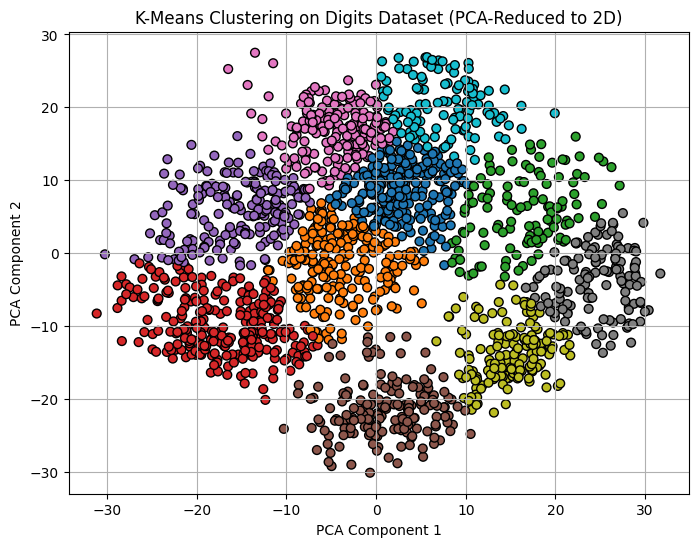

In [3]:
#28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means


from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_pca)
kmeans_labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='tab10', edgecolor='k', s=40)
plt.title('K-Means Clustering on Digits Dataset (PCA-Reduced to 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


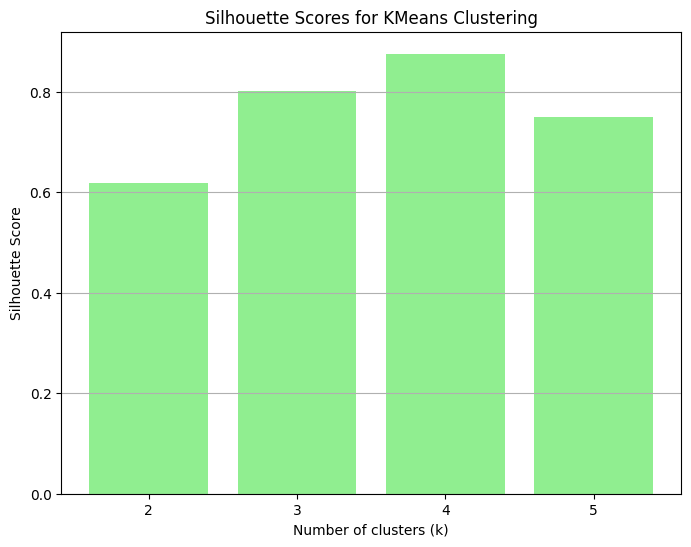

In [7]:
#29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

k_values = range(2, 6)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.bar(k_values, silhouette_scores, color='lightgreen')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for KMeans Clustering')
plt.xticks(k_values)
plt.grid(True, axis='y')
plt.show()


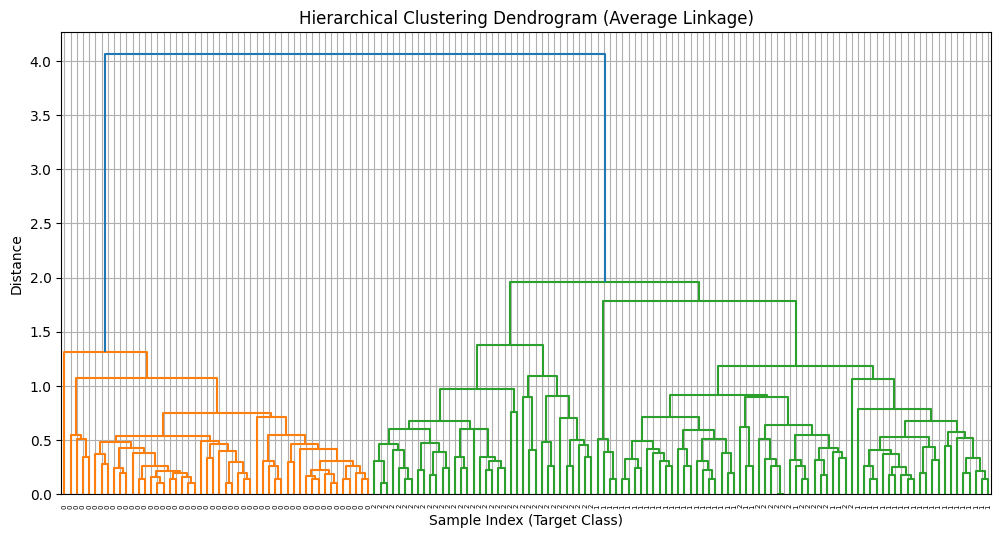

In [8]:
#30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.

from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

linkage_matrix = linkage(X, method='average')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=iris.target, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Sample Index (Target Class)')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


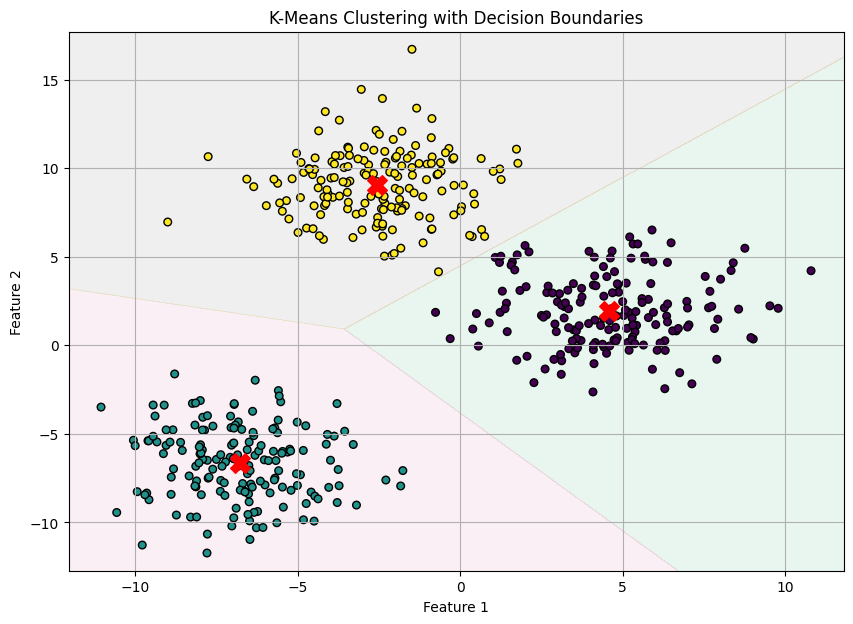

In [9]:
#31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=2.0, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),hp.arange(y_min, y_max, 0.02))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = kmeans.predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel2')
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='viridis', edgecolor='k')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')
plt.title('K-Means Clustering with Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


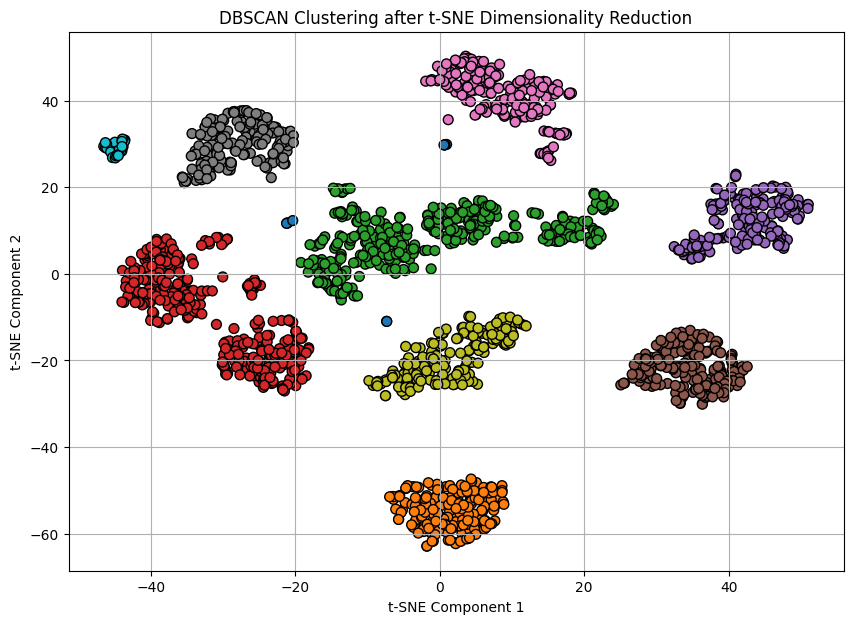

In [10]:
#32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.


from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', edgecolor='k', s=50)
plt.title('DBSCAN Clustering after t-SNE Dimensionality Reduction')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


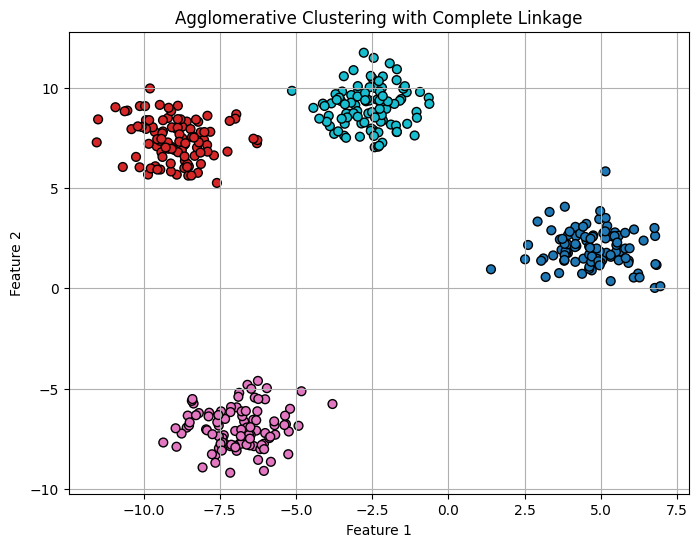

In [11]:
#33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result.


from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=1.0, random_state=42)

agglo = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agglo.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', edgecolor='k', s=40)
plt.title('Agglomerative Clustering with Complete Linkage')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


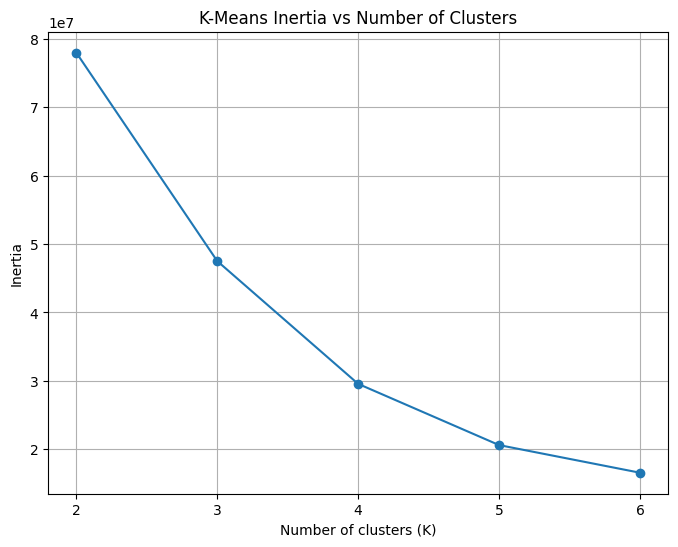

In [12]:
#34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot.


from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data

k_values = range(2, 7)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.title('K-Means Inertia vs Number of Clusters')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


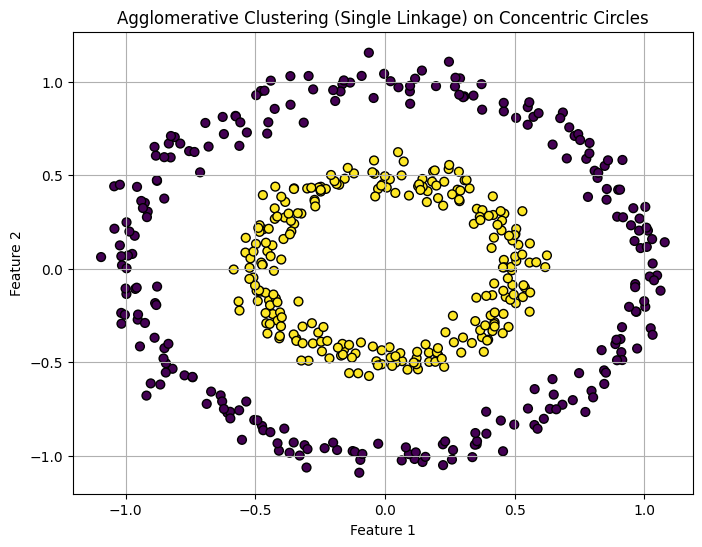

In [13]:
#35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage.


from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, y_true = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

agglo = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agglo.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=40)
plt.title('Agglomerative Clustering (Single Linkage) on Concentric Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


In [14]:
#36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise).


from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

num_clusters = len(np.unique(labels)) - (1 if -1 in labels else 0)

print(f'Number of clusters (excluding noise): {num_clusters}')


Number of clusters (excluding noise): 0


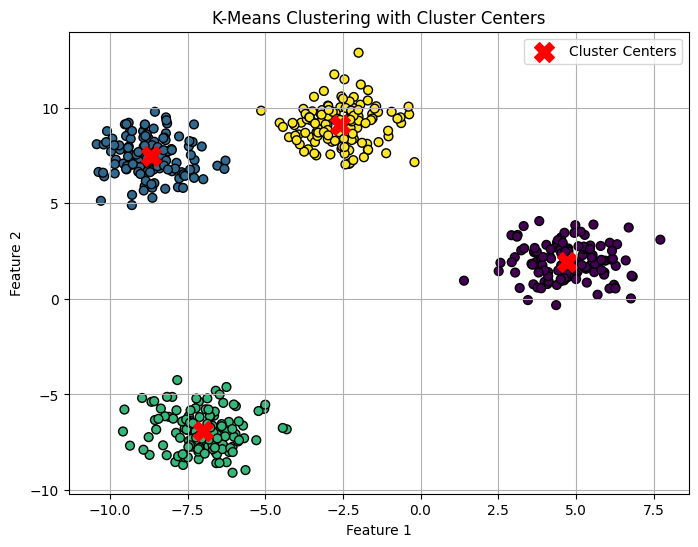

In [15]:
#37.  Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points.


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=40)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-Means Clustering with Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
#38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.


from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import numpy as np


iris = load_iris()
X = iris.data

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

num_noise_samples = np.sum(labels == -1)

print(f'Number of samples identified as noise: {num_noise_samples}')


Number of samples identified as noise: 17


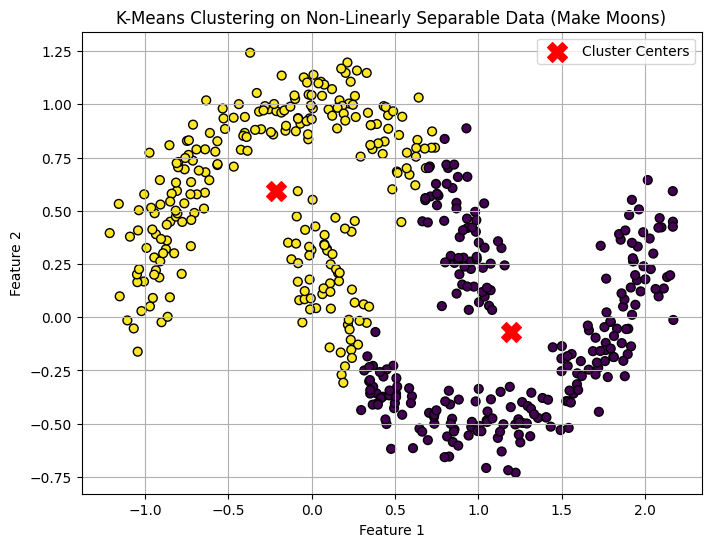

In [17]:
#39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result


from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y_true = make_moons(n_samples=500, noise=0.1, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=40)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-Means Clustering on Non-Linearly Separable Data (Make Moons)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


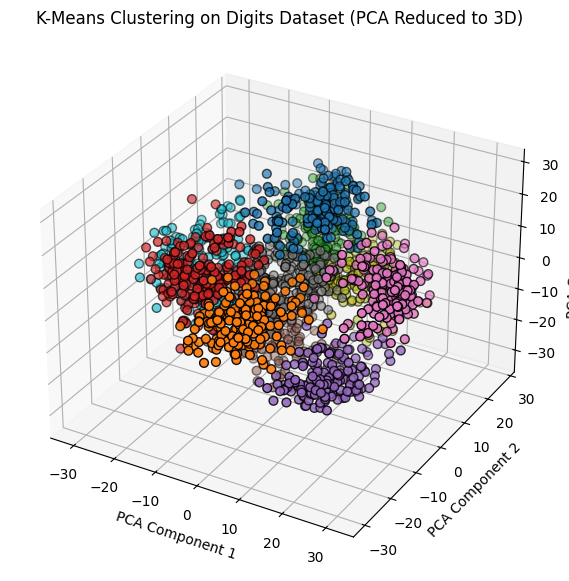

In [18]:
#40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.


from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X = digits.data

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10', edgecolor='k', s=40)

ax.set_title('K-Means Clustering on Digits Dataset (PCA Reduced to 3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.show()


Silhouette Score: 0.6787


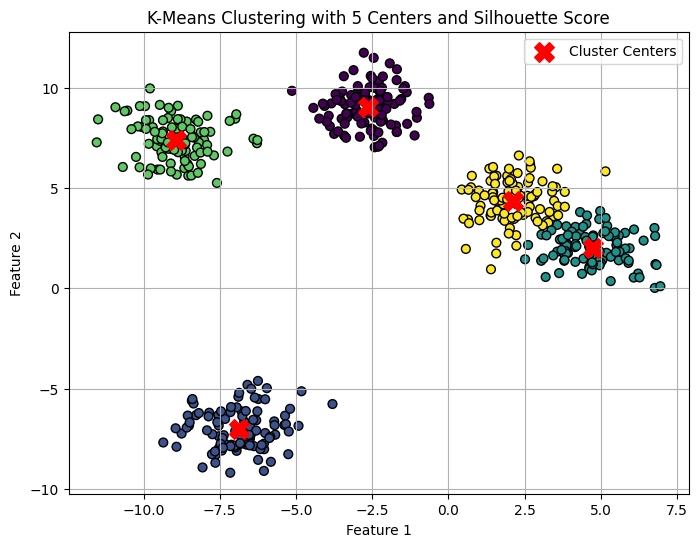

In [19]:
#41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=500, centers=5, cluster_std=1.0, random_state=42)

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

score = silhouette_score(X, labels)

print(f'Silhouette Score: {score:.4f}')

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=40)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('K-Means Clustering with 5 Centers and Silhouette Score')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


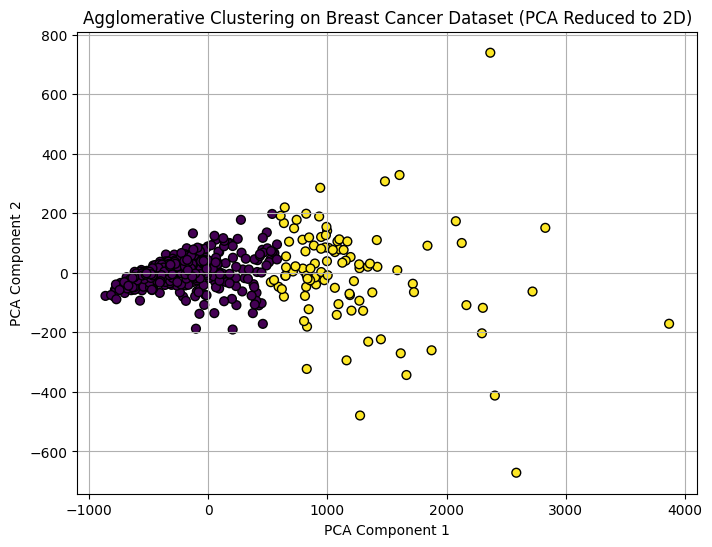

In [20]:
#42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D.


from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = agglo.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=40)
plt.title('Agglomerative Clustering on Breast Cancer Dataset (PCA Reduced to 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


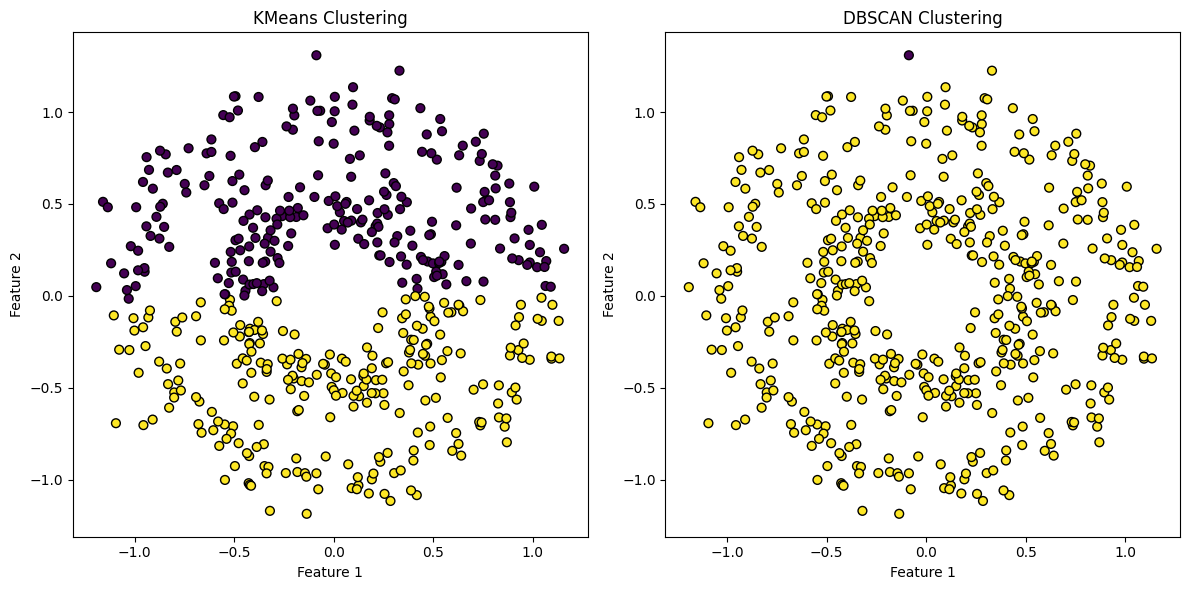

In [21]:
#43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side.


from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=500, factor=0.5, noise=0.1, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=40)
axes[0].set_title('KMeans Clustering')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

axes[1].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', edgecolor='k', s=40)
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


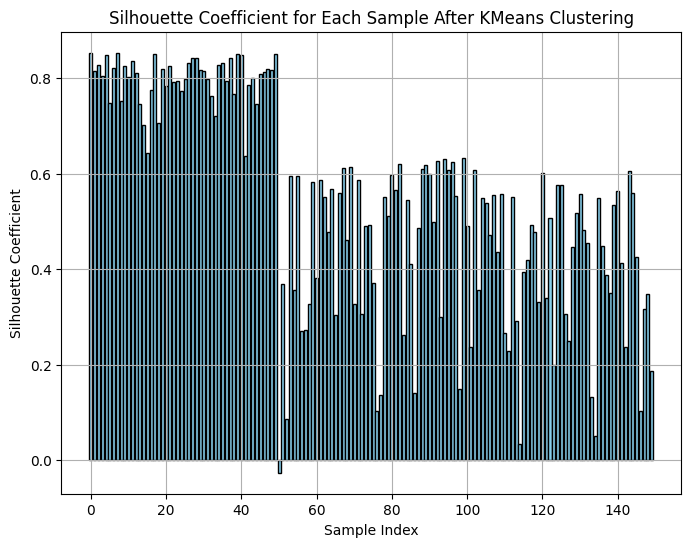

In [22]:
#44.  Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.


from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

silhouette_vals = silhouette_samples(X, labels)

plt.figure(figsize=(8, 6))
plt.bar(range(len(silhouette_vals)), silhouette_vals, color='skyblue', edgecolor='k')
plt.title('Silhouette Coefficient for Each Sample After KMeans Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()


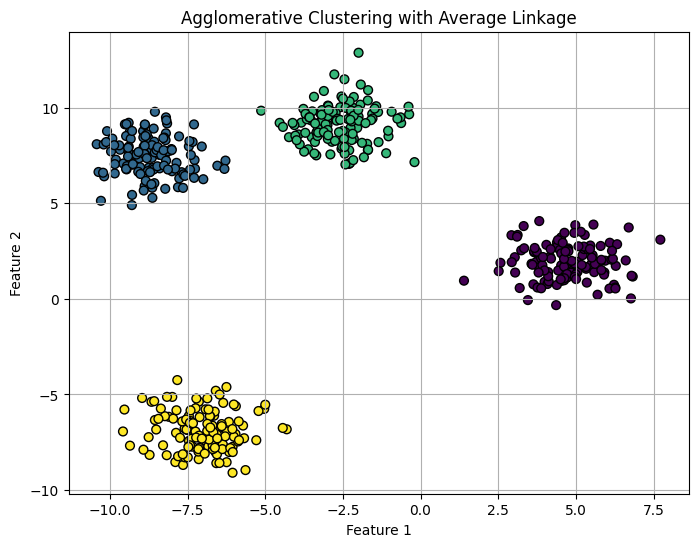

In [23]:
#45.  Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters.


from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

agglo = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agglo.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=40)
plt.title('Agglomerative Clustering with Average Linkage')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


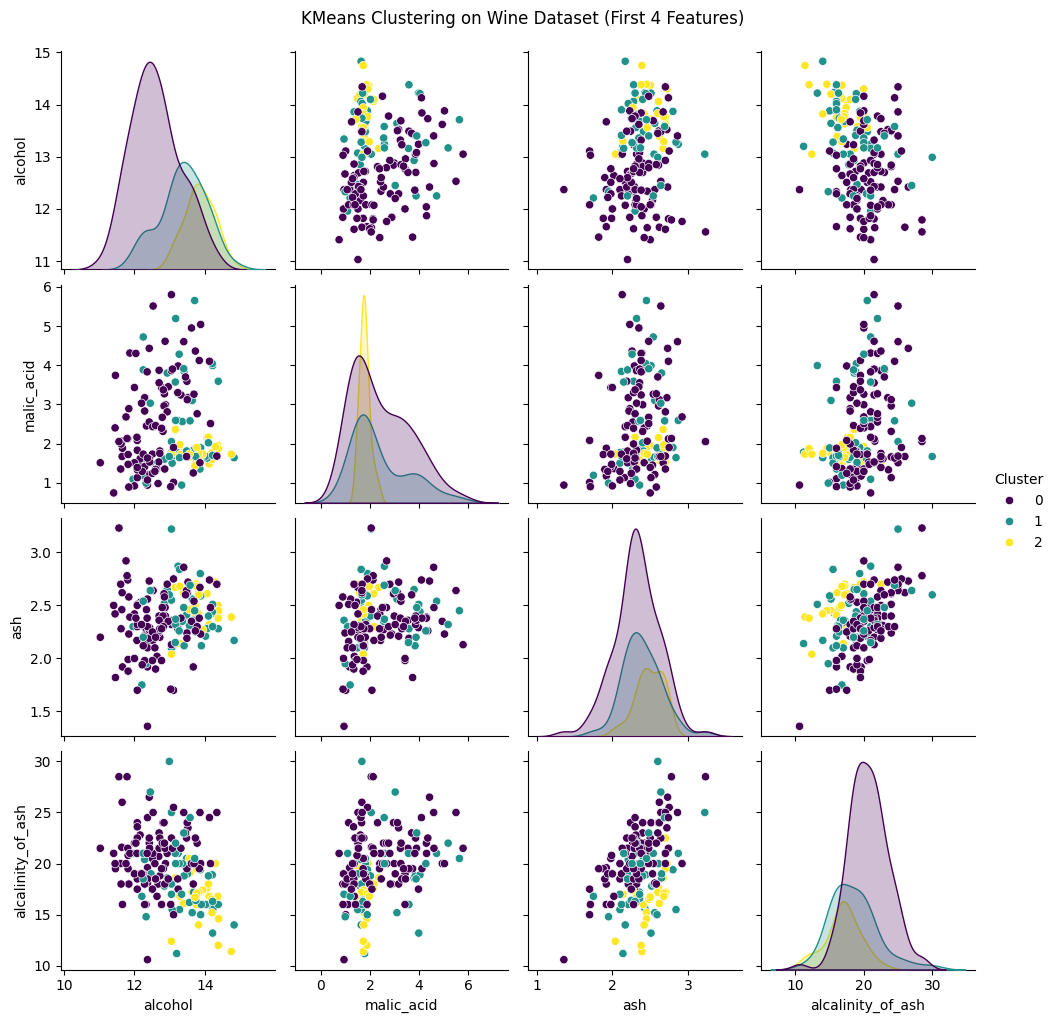

In [24]:
#46.  Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features).

from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd

wine = load_wine()
X = wine.data
y = wine.target

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

df = pd.DataFrame(X[:, :4], columns=wine.feature_names[:4])
df['Cluster'] = kmeans_labels

sns.pairplot(df, hue='Cluster', palette='viridis')
plt.suptitle('KMeans Clustering on Wine Dataset (First 4 Features)', y=1.02)
plt.show()



In [25]:
#47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count.


from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
num_noise_points = np.sum(labels == -1)

print(f'Number of clusters: {num_clusters}')
print(f'Number of noise points: {num_noise_points}')


Number of clusters: 21
Number of noise points: 237


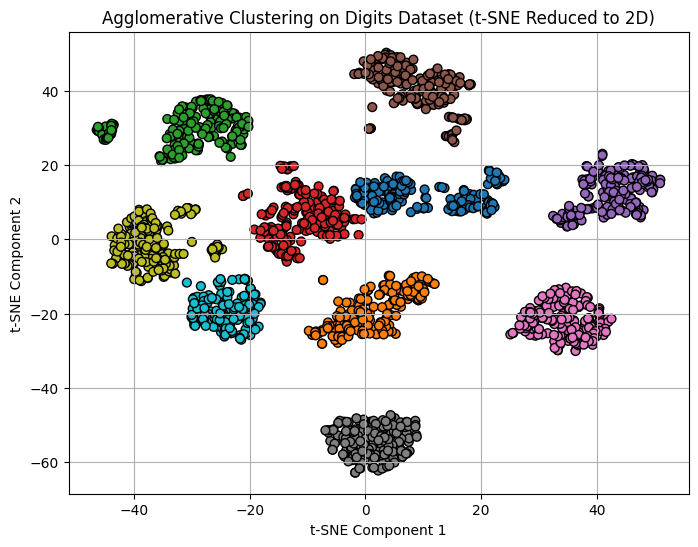

In [26]:
#48.  Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.


from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

agglo = AgglomerativeClustering(n_clusters=10)
labels = agglo.fit_predict(X_tsne)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', edgecolor='k', s=40)
plt.title('Agglomerative Clustering on Digits Dataset ')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()
